<h1>Use of Samples of Different Classes of Iris Plants for Their Population Inference</h1>

<h2>Introduction</h2>

<p>
This group shall explore and analyse a dataset for the flower Iris for this project. The dataset contains 50 samples of three species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor). The following four features are given for each species: sepal length, sepal width, petal length, and petal width. We shall compare the sepal lengths for Iris Setosa and Iris Versicolor. Precisely, the question we shall aim to answer is: Does Iris Setosa have a higher mean sepal length than Iris Versicolor? The initial analysis revealed an approximately normally distributed sepal lengths for both species, therefore the location parameter we have chosen is the mean and to analyse the variation in our parameter estimates, the scale parameter we have chosen is the standard deviation.
</p>

<h2>
Exploratory Data Analysis 
</h2>

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




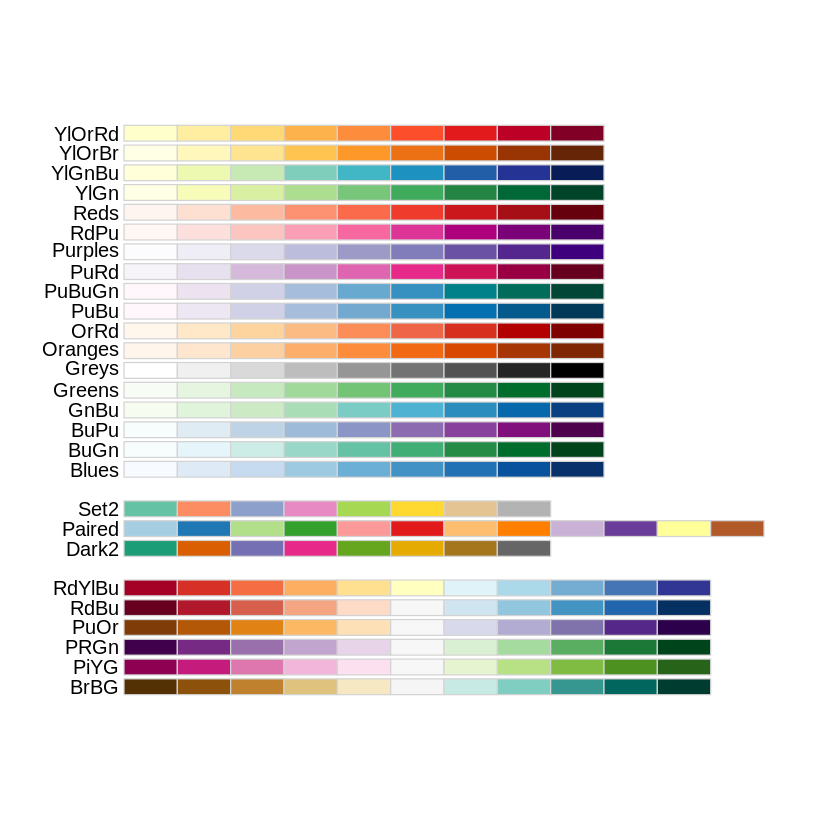

In [1]:
library(tidyverse)
library(repr)
library(scales)
library(RColorBrewer)
library(infer)
# Ensure the Palette used is colour blind friendly
display.brewer.all(colorblindFriendly = TRUE)

In [2]:
# Loading the Dataset
url = "https://raw.githubusercontent.com/fulleraltamiranoe/stat-201-project/main/iris.csv"
iris_data <- read_csv(url) 
head(iris_data)

Rows: 150 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): class
dbl (4): sepal_length, sepal_width, petal_length, petal_width


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



sepal_length,sepal_width,petal_length,petal_width,class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
# Set seed to ensure reproducible randomness
set.seed(1001)

# Treat class as factor and filter for class of interest (Iris-setosa)
iris_setosa_sample <- iris_data %>%
    mutate(class = as_factor(class)) %>%
    filter(class == 'Iris-setosa') %>%
    select(sepal_length)
head(iris_setosa_sample) # sample size = 50 each

# Treat class as factor and filter for class of interest (Iris-versicolor)
iris_versicolor_sample <- iris_data %>%
    mutate(class = as_factor(class)) %>%
    filter(class == 'Iris-versicolor') %>%
    select(sepal_length)
head(iris_versicolor_sample) # sample size = 50

# Point parameter of interest (sepal length mean)
setosa_mean <- iris_setosa_sample %>%
    summarize(setosa_mean = mean(sepal_length), setosa_sd = sd(sepal_length))
setosa_mean

# Point parameter of interest (sepal length mean)
versicolor_mean <- iris_versicolor_sample %>%
    summarize(versicolor_mean = mean(sepal_length), versicolor_sd = sd(sepal_length))
versicolor_mean

sepal_length
<dbl>
5.1
4.9
4.7
4.6
5.0
5.4


sepal_length
<dbl>
7.0
6.4
6.9
5.5
6.5
5.7


setosa_mean,setosa_sd
<dbl>,<dbl>
5.006,0.3524897


versicolor_mean,versicolor_sd
<dbl>,<dbl>
5.936,0.5161711


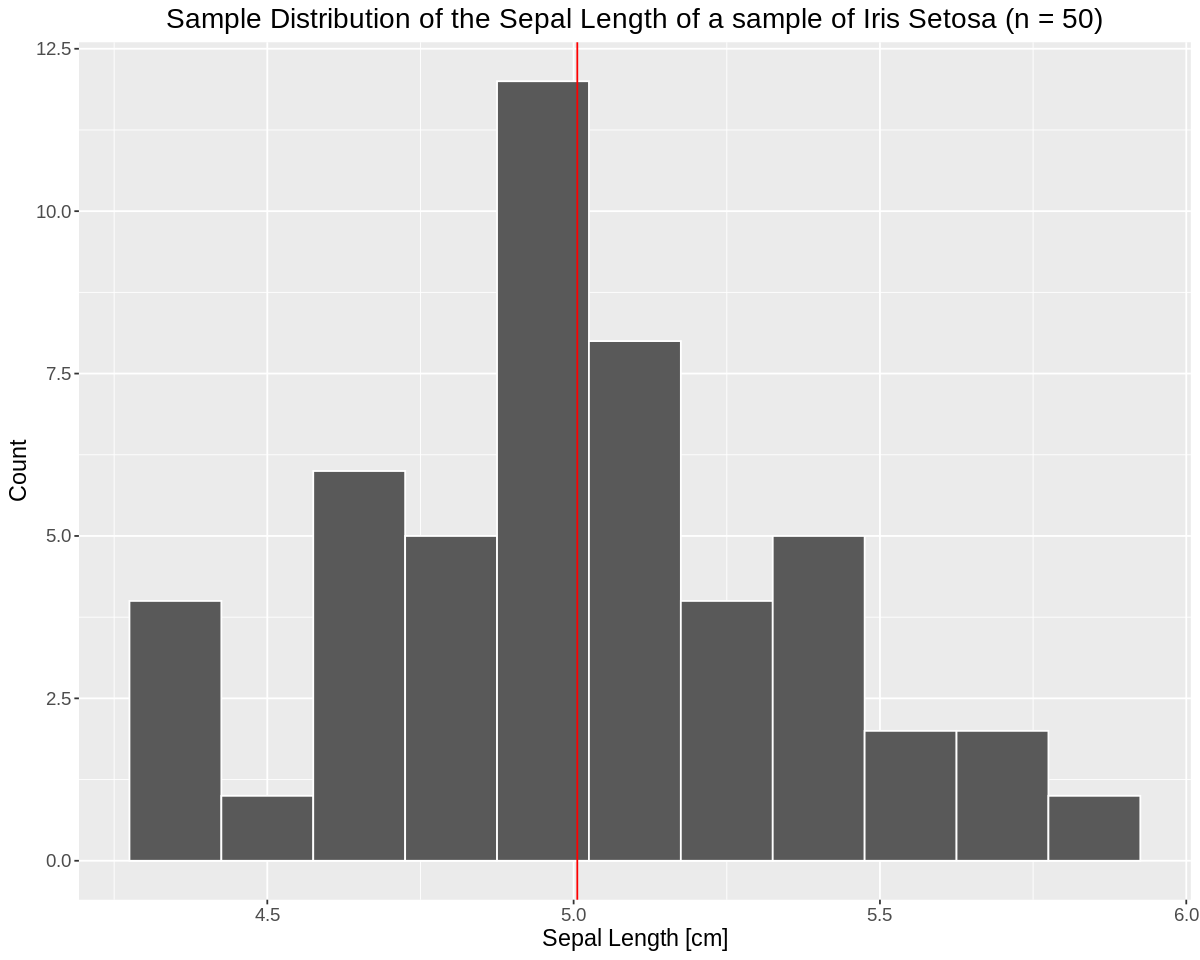

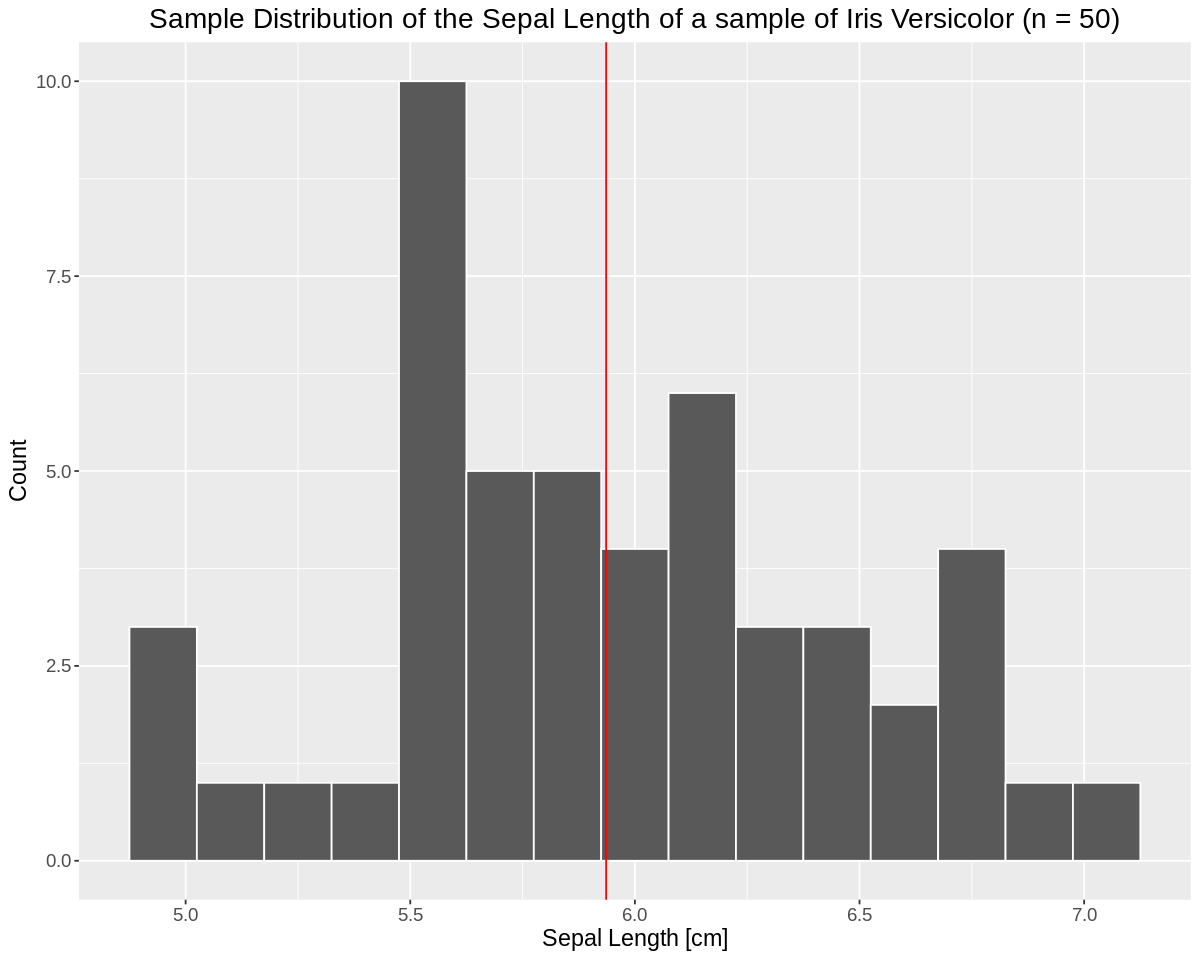

In [4]:
# Visualize Sample Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
setosa_sample_dist <- iris_setosa_sample %>%
    ggplot(aes(x = sepal_length)) +
    geom_histogram(binwidth = 0.15, colour = 'white') +
    geom_vline(aes(xintercept = setosa_mean$setosa_mean), color = 'red') +
    labs(x = 'Sepal Length [cm]', y = 'Count') +
    ggtitle('Sample Distribution of the Sepal Length of a sample of Iris Setosa (n = 50)') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5))
setosa_sample_dist

# Visualize Sample Distribution
options(repr.plot.width = 10, repr.plot.height = 8)
versicolor_sample_dist <- iris_versicolor_sample %>%
    ggplot(aes(x = sepal_length)) +
    geom_histogram(binwidth = 0.15, colour = 'white') +
    geom_vline(aes(xintercept = versicolor_mean$versicolor_mean), color = 'red') +
    labs(x = 'Sepal Length [cm]', y = 'Count') +
    ggtitle('Sample Distribution of the Sepal Length of a sample of Iris Versicolor (n = 50)') +
    theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5))
versicolor_sample_dist

<h2>
Methods
</h2>
<p>
In order to test our inferential question, we want to formulate a null hypothesis and an alternate hypothesis. Our null hypothesis states that the mean sepal length of Iris Setosa minus that of Iris Versicolor = 0, our alternate hypothesis then states that the mean sepal length of Iris Setosa minus that of Iris Versicolor > 0. To analyze if the null hypothesis is true, we would first look at the observed statistics, where we can calculate the mean sepal length of Iris Setosa minus that of Iris Versicolor. Further, we would generate samples from the null distribution and then calculate the results of the hypothesis test. Both steps can be done using the infer package in R. We can then plot the results of the hypothesis test and calculate a respective p-value. With this p-value, we would then be able to make a conclusion on whether we have enough evidence to reject the null hypothesis. Moreover, as we analyze the implications of the p-value, comments on type I and type II errors can be made.
</p>

<h2>
References
</h2>
    
    